In [11]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

import delfi
from delfi.simulator.BaseSimulator import BaseSimulator
from delfi.inference import SNPE
import delfi.distribution as dd
from delfi.summarystats import Identity
from delfi.summarystats.BaseSummaryStats import BaseSummaryStats
from delfi.generator import Default
from delfi.generator import MPGenerator

import models as md

In [12]:
fit_df = pd.read_hdf('../data/generated/fitting_validation_error.hdf5', key='fitting_results')

In [13]:
fit_df.keys()

Index(['final_loss', 'logs_list', 'mean_noise_std_exc', 'mean_rho_null',
       'mean_rho_null_std', 'mean_rho_scale', 'posterior_object',
       'std_noise_std_exc', 'std_rho_null', 'std_rho_null_std',
       'std_rho_scale', 'true_noise_std_exc', 'true_rho_null',
       'true_rho_null_std', 'true_rho_scale'],
      dtype='object')

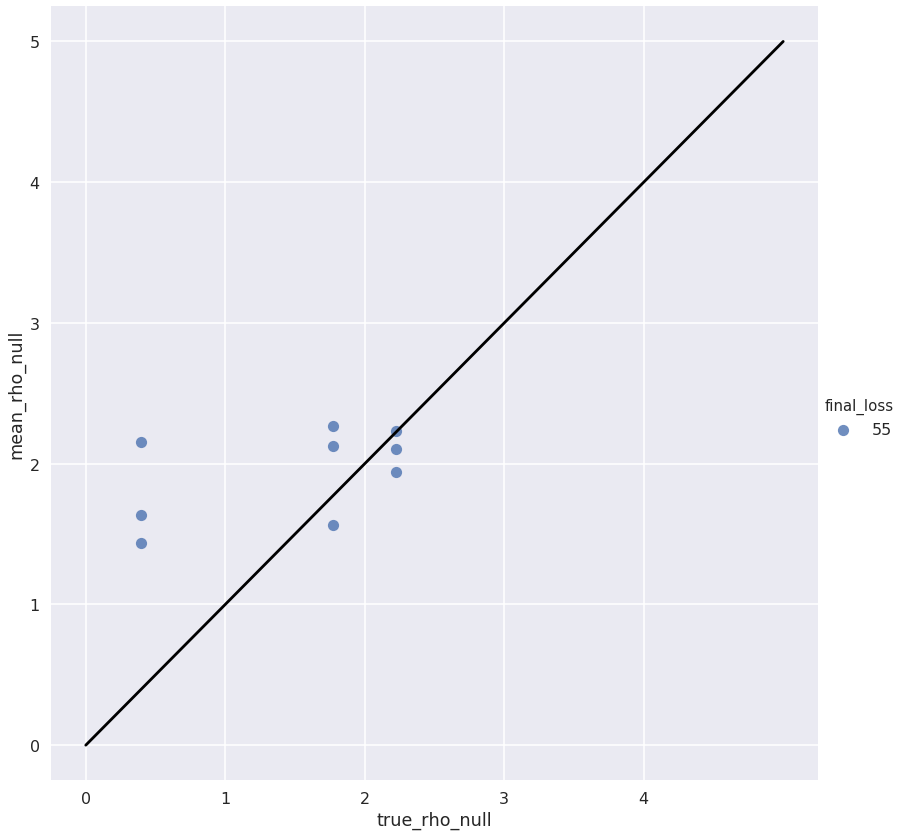

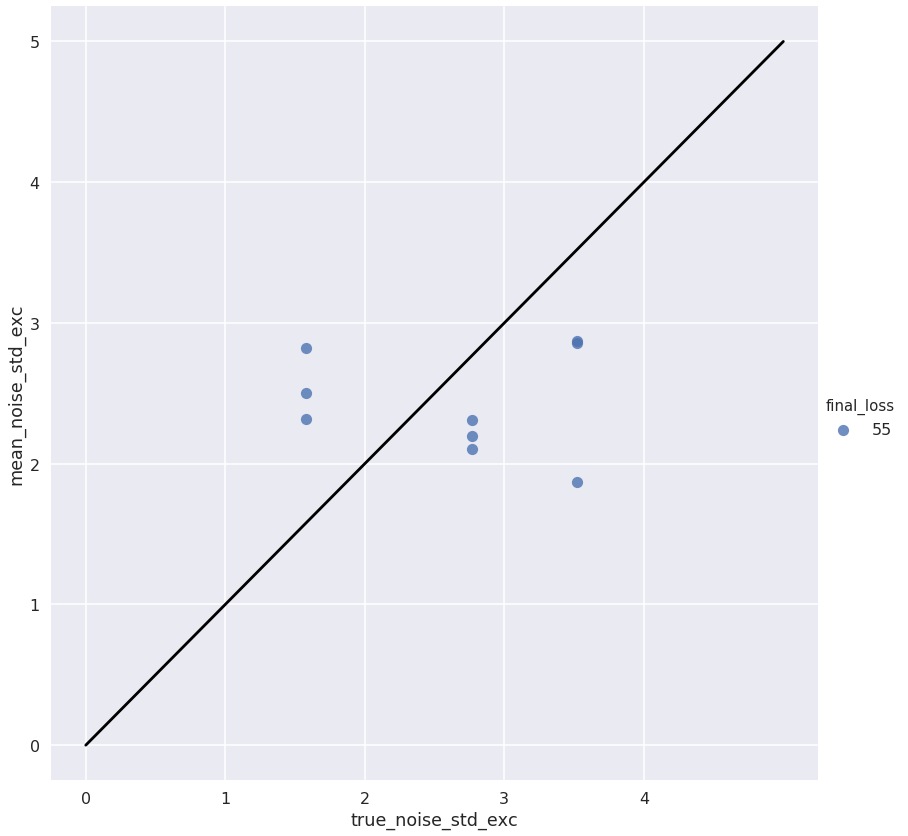

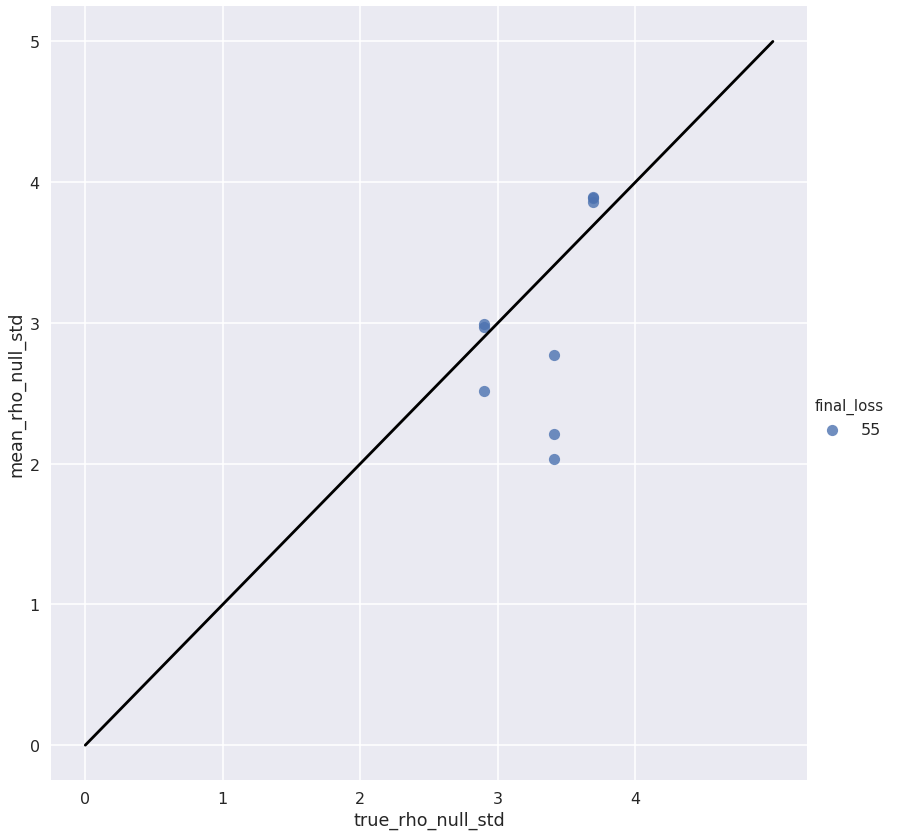

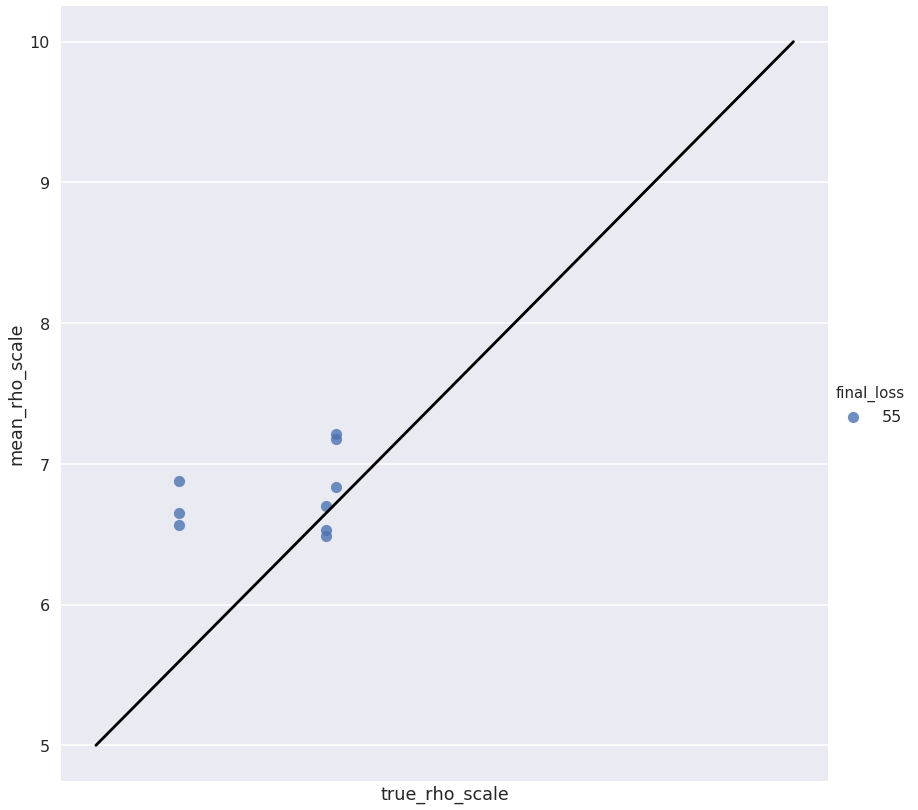

In [50]:
sns.set('poster')

sns.lmplot(x='true_rho_null', y='mean_rho_null', hue='final_loss', data=fit_df, fit_reg=False, size=12)
plt.xticks(np.arange(5), np.arange(5))
plt.plot([0, 5], [0,5], 'k')

sns.lmplot(x='true_noise_std_exc', y='mean_noise_std_exc', hue='final_loss', data=fit_df, fit_reg=False, size=12)
plt.xticks(np.arange(5), np.arange(5))
plt.plot([0, 5], [0,5], 'k')

sns.lmplot(x='true_rho_null_std', y='mean_rho_null_std', hue='final_loss', data=fit_df, fit_reg=False, size=12)
plt.xticks(np.arange(5), np.arange(5))
plt.plot([0, 5], [0,5], 'k')

sns.lmplot(x='true_rho_scale', y='mean_rho_scale', hue='final_loss', data=fit_df, fit_reg=False, size=12)
plt.xticks(np.arange(5), np.arange(5))
plt.plot([5, 10], [5, 10], 'k')

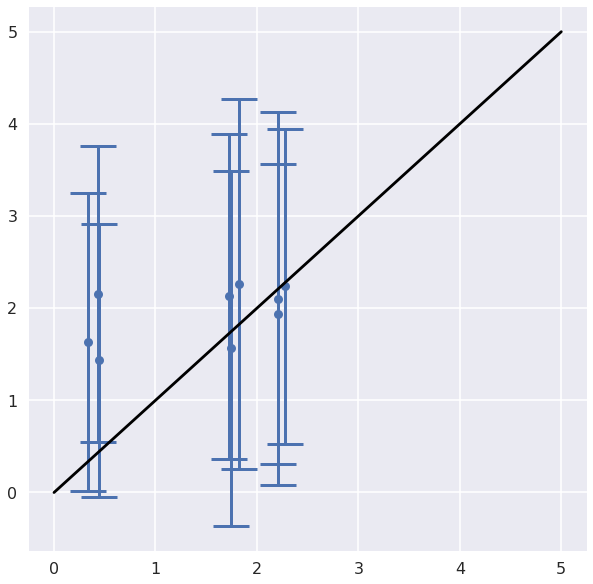

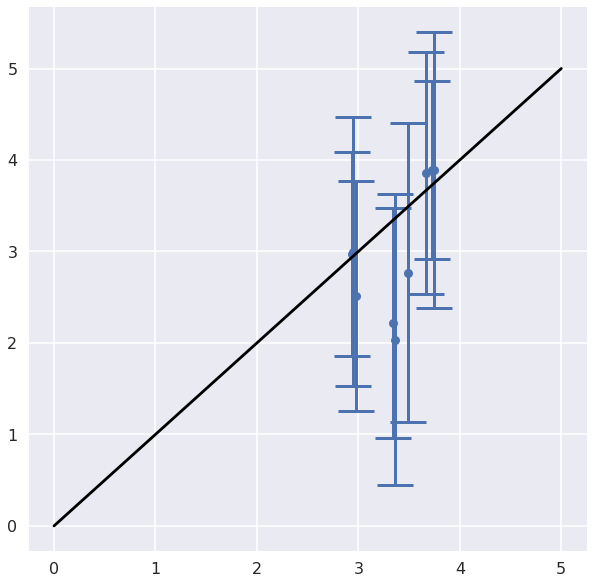

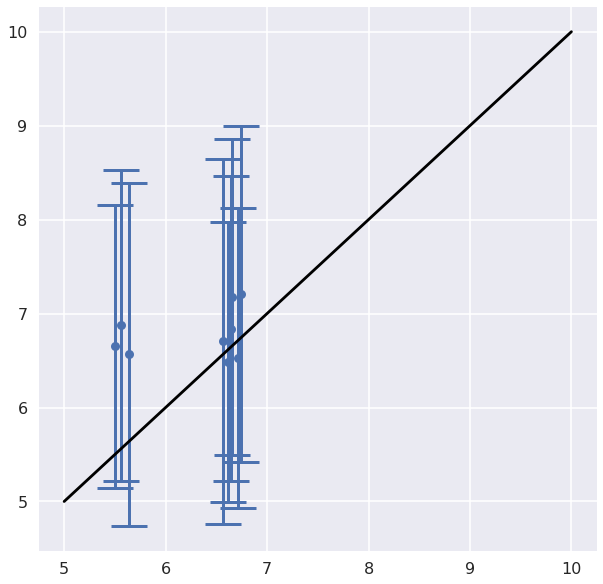

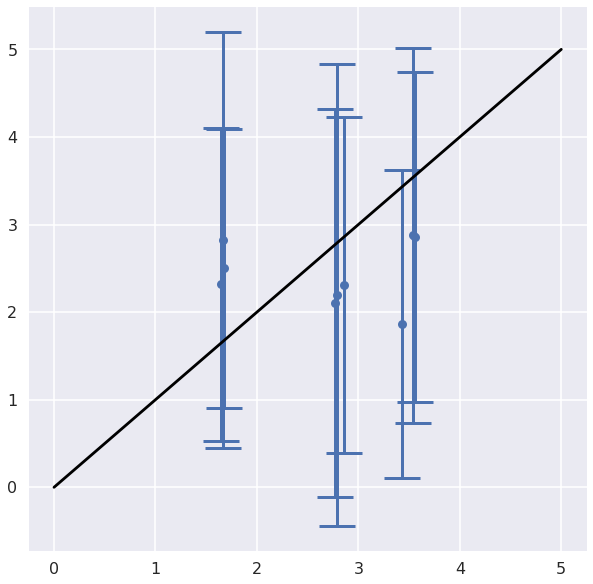

In [81]:
def plot_true_vs_estimate(param_name, xmin=0, xmax=5):
    jitter = np.random.rand(len(fit_df))*0.2 - 0.1
    plt.figure(figsize=(10,10))
    plt.errorbar(fit_df['true_' + param_name] + jitter, fit_df['mean_' + param_name], yerr=fit_df['std_' + param_name],
                 fmt='.', capsize=18, barsabove=True, capthick=3, lw=3, ms=18)
    plt.plot([xmin, xmax], [xmin, xmax], 'k')
    
plot_true_vs_estimate('rho_null')
plot_true_vs_estimate('rho_null_std')
plot_true_vs_estimate('rho_scale', xmin=5, xmax=10)
plot_true_vs_estimate('noise_std_exc')

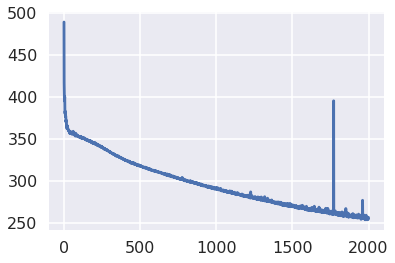

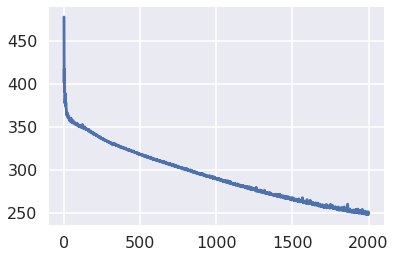

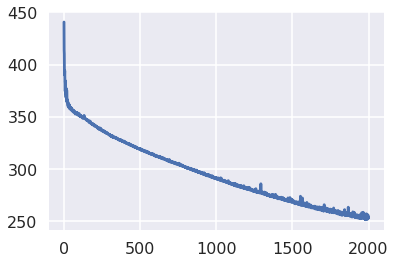

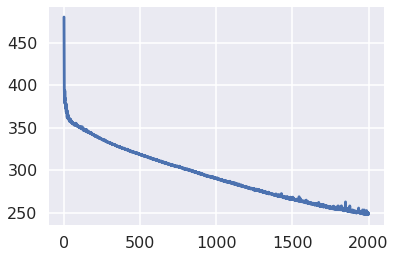

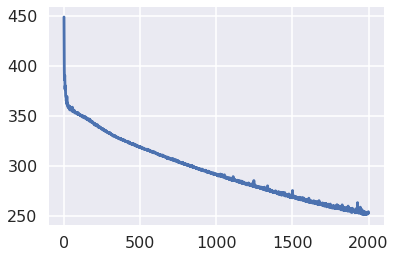

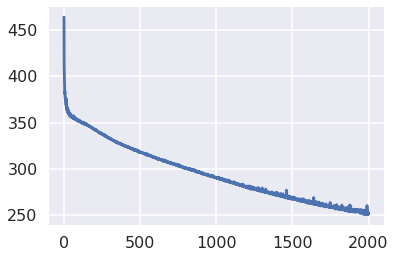

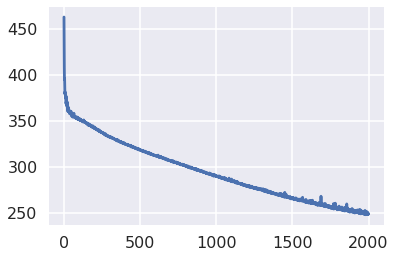

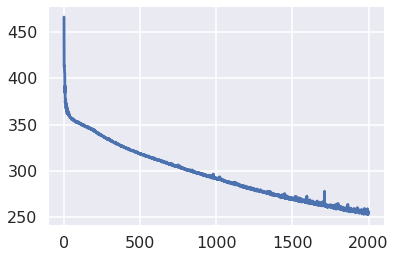

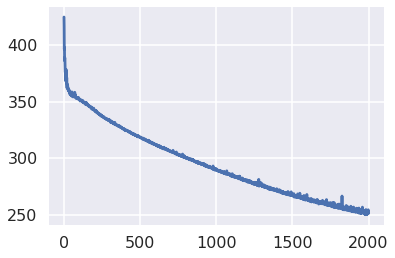

In [82]:
for i in range(len(fit_df)):
    plt.figure()
    plt.plot(fit_df['logs_list'][i][0]['loss'])

In [87]:
meta_df = pd.read_hdf('../data/generated/fitting_metaparams_exploration.hdf5', key='fitting_results')
true_params = pd.read_hdf('../data/generated/fitting_metaparams_exploration.hdf5', key='ground_truth_params')

In [88]:
meta_df.keys()

Index(['final_loss', 'logs_list', 'mean_noise_std_exc', 'mean_rho_null',
       'mean_rho_null_std', 'mean_rho_scale', 'n_hidden', 'n_rounds',
       'n_train', 'posterior_object', 'std_noise_std_exc', 'std_rho_null',
       'std_rho_null_std', 'std_rho_scale'],
      dtype='object')

In [89]:
true_params

,noise_std_exc,rho_null,rho_null_std,rho_scale
0,2.927578,2.079918,0.709675,6.472831


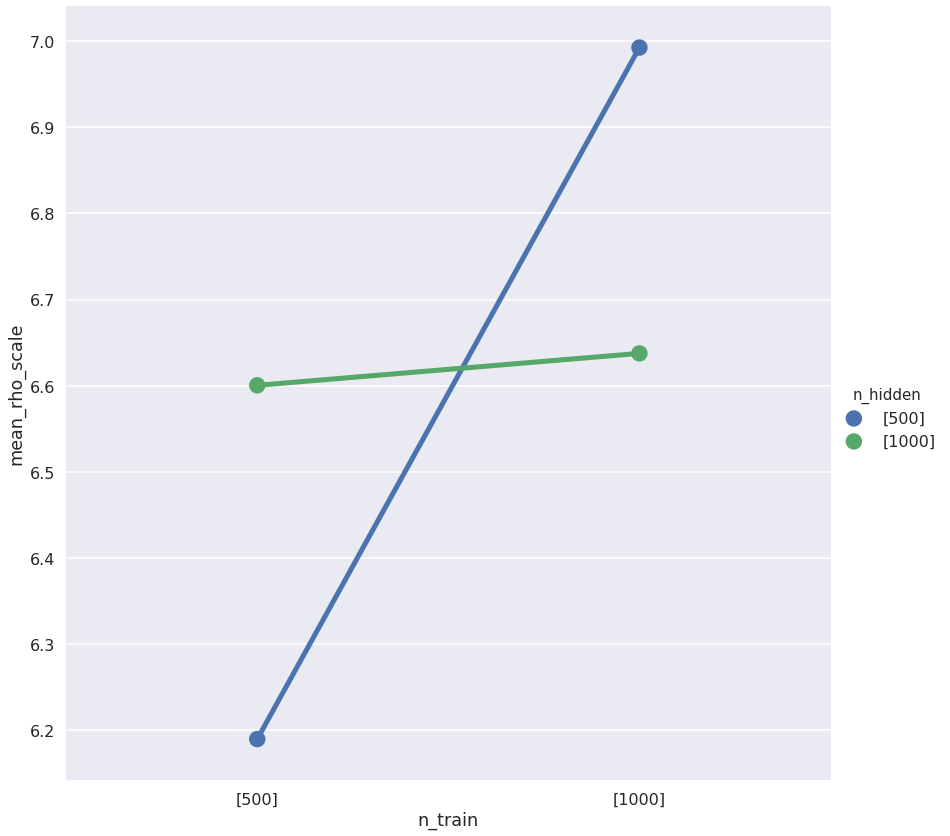

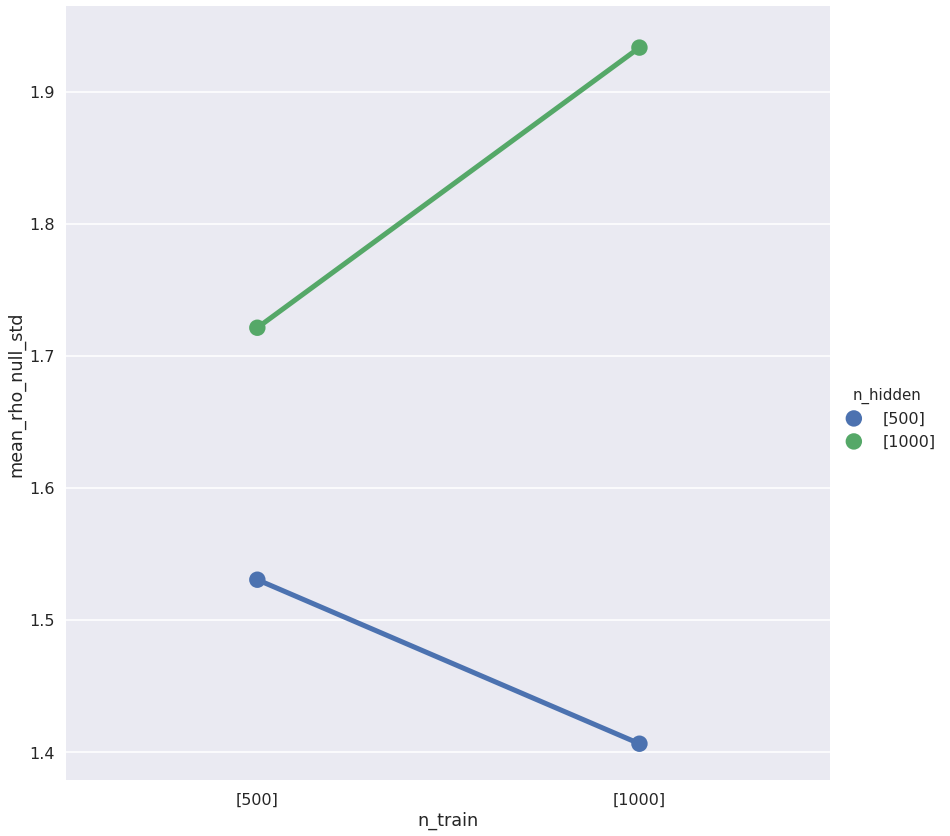

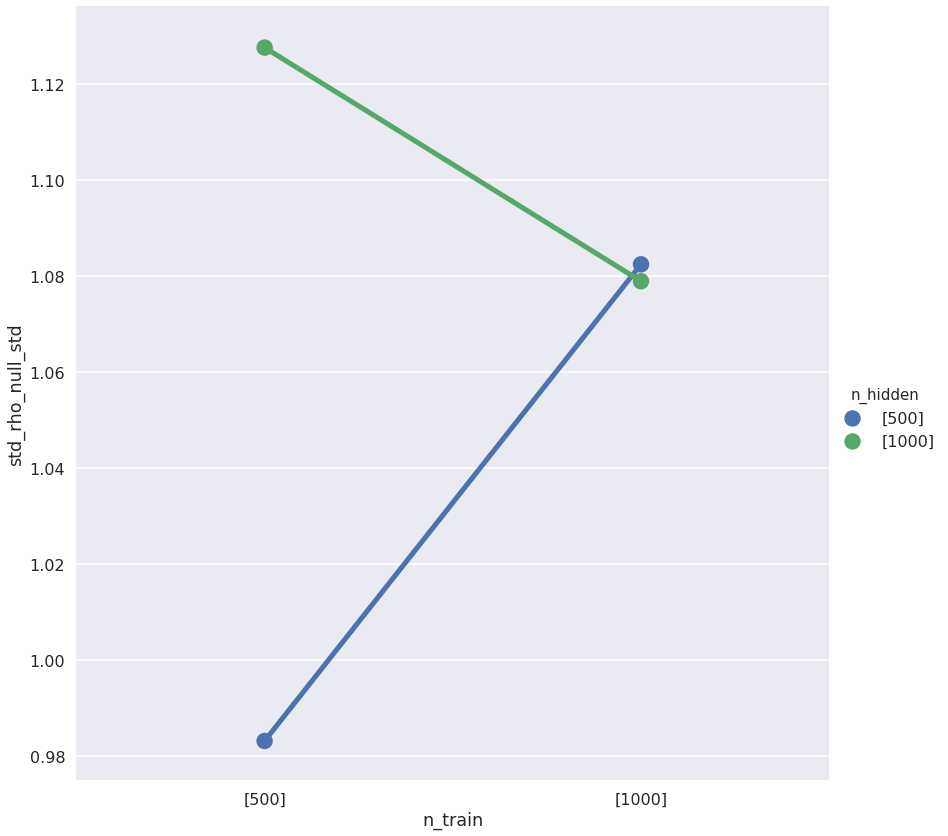

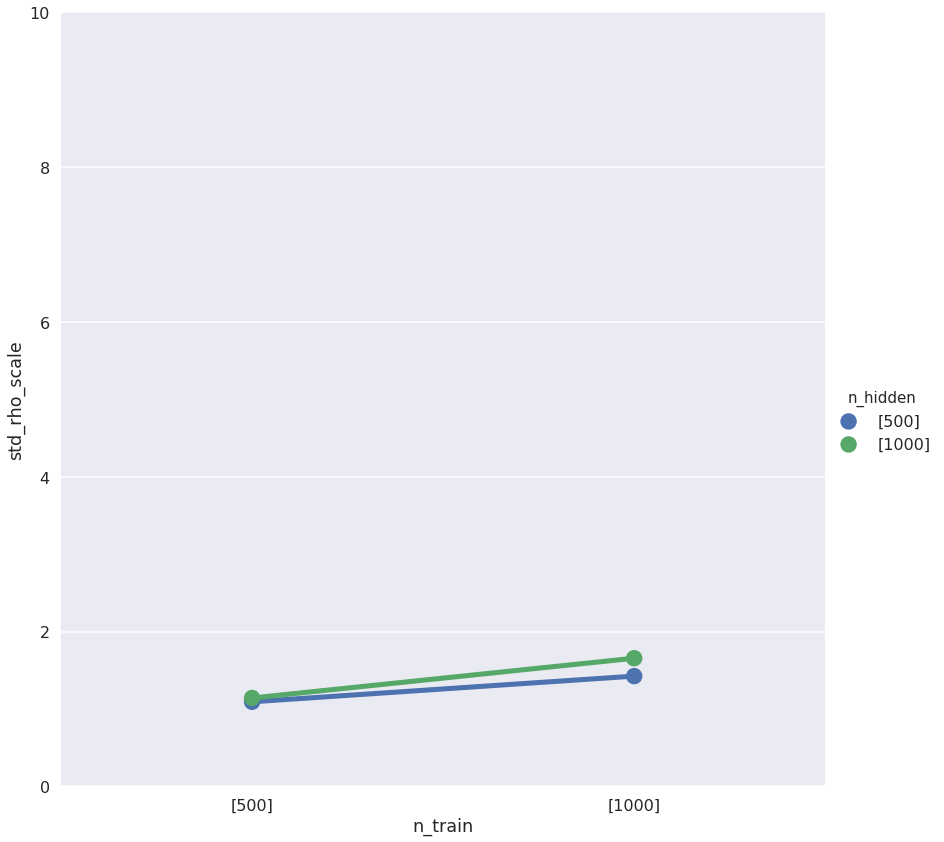

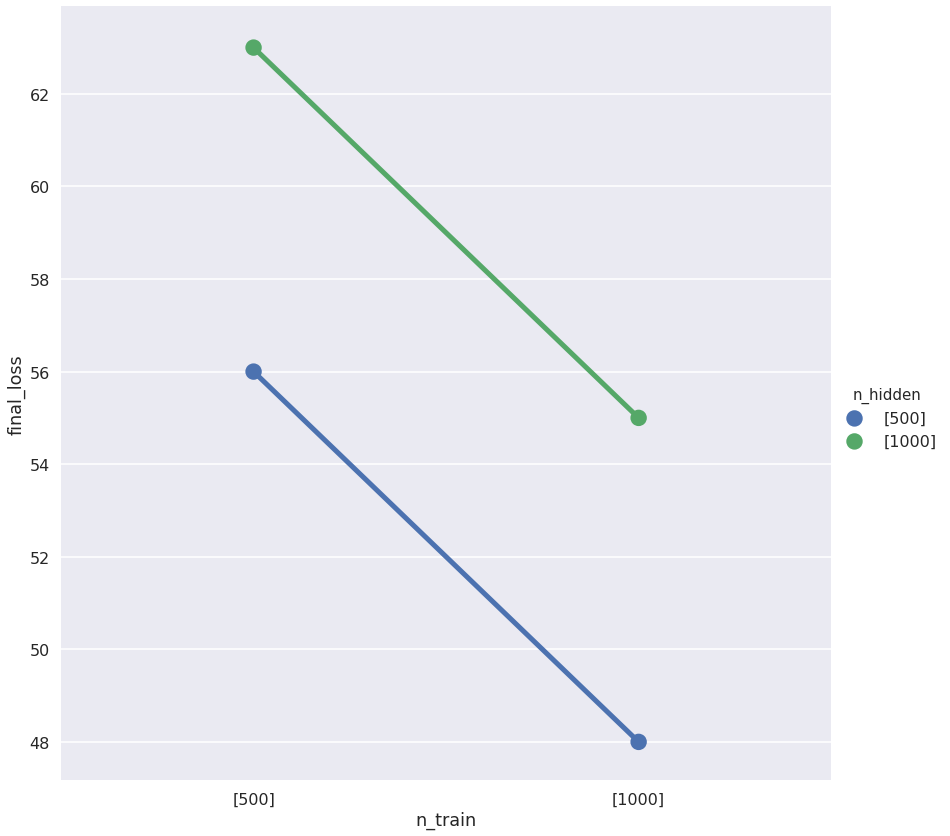

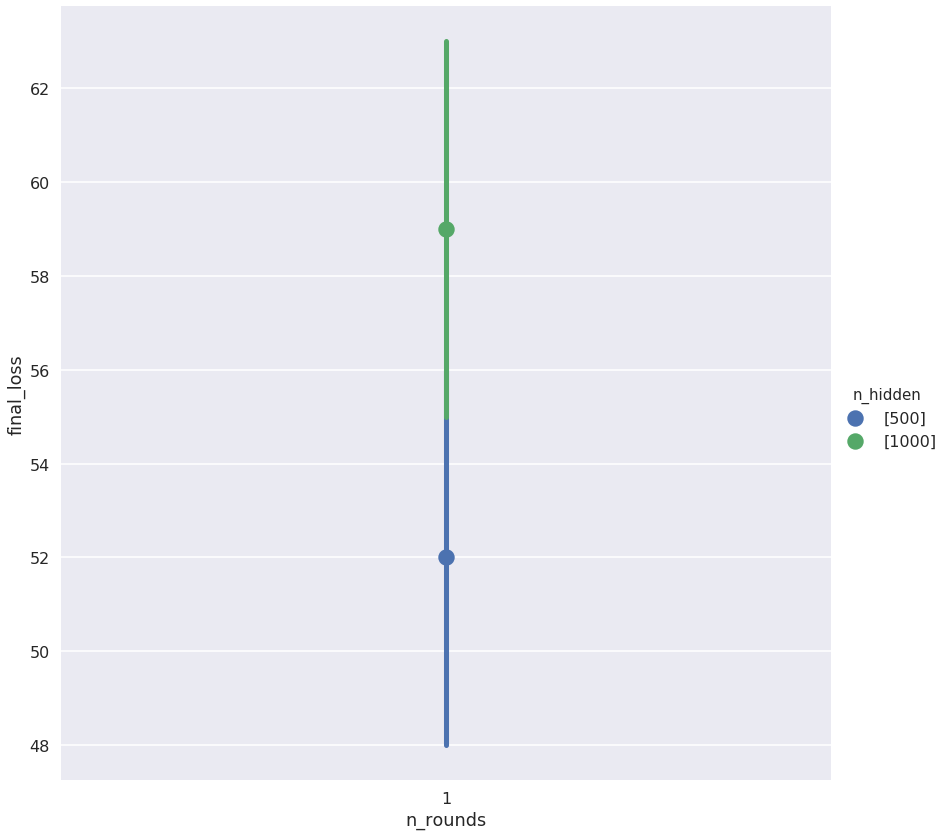

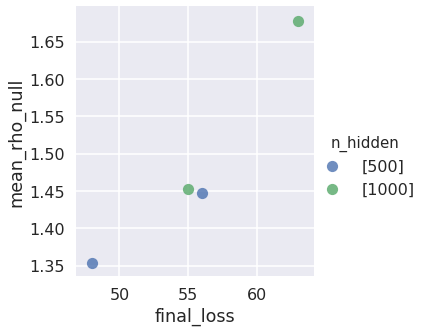

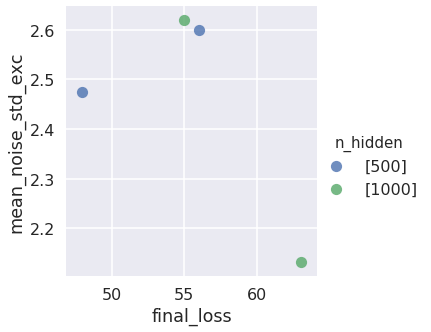

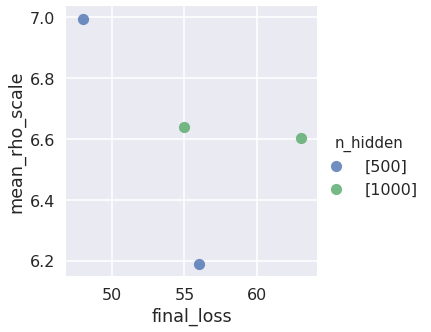

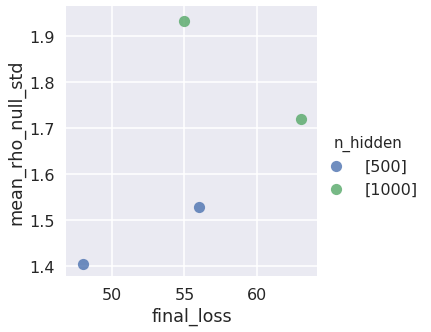

In [92]:
sns.set('poster')
sns.factorplot(x='n_train', y='mean_rho_scale', hue='n_hidden', kind='point', data=meta_df, size=12)
sns.factorplot(x='n_train', y='mean_rho_null_std', hue='n_hidden', kind='point', data=meta_df, size=12)
sns.factorplot(x='n_train', y='std_rho_null_std', hue='n_hidden', kind='point', data=meta_df, size=12)
sns.factorplot(x='n_train', y='std_rho_scale', hue='n_hidden', kind='point', data=meta_df, size=12)
plt.ylim([0,10])
grid = sns.factorplot(x='n_train', y='final_loss', hue='n_hidden', kind='point', data=meta_df, size=12)
grid = sns.factorplot(x='n_rounds', y='final_loss', hue='n_hidden', kind='point', data=meta_df, size=12)
#grid.set(yscale='log')
grid = sns.lmplot(x='final_loss', y='mean_rho_null', hue='n_hidden', fit_reg=False, data=meta_df)
grid = sns.lmplot(x='final_loss', y='mean_noise_std_exc', hue='n_hidden', fit_reg=False, data=meta_df)
grid = sns.lmplot(x='final_loss', y='mean_rho_scale', hue='n_hidden', fit_reg=False, data=meta_df)
grid = sns.lmplot(x='final_loss', y='mean_rho_null_std', hue='n_hidden', fit_reg=False, data=meta_df)

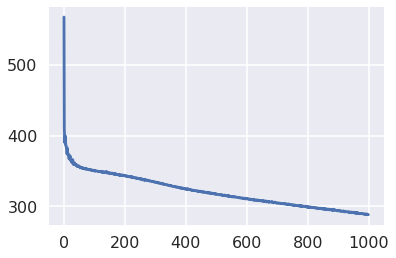

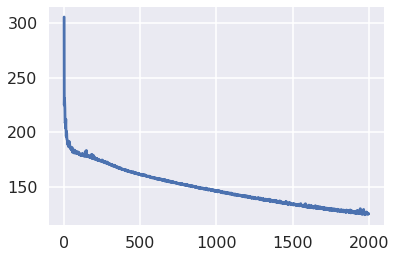

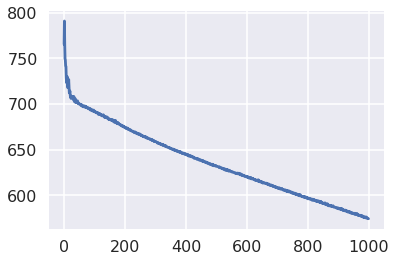

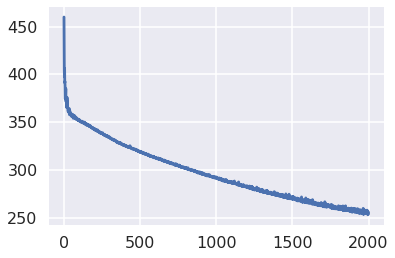

In [94]:
for i in range(len(meta_df)):
    plt.figure()
    plt.plot(meta_df['logs_list'][i][0]['loss'])